In [124]:
import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import seaborn as sns
import numpy as np
import plotly.graph_objects as go
from scipy.stats import linregress
from sklearn.calibration import LabelEncoder
from sklearn.discriminant_analysis import StandardScaler
from sklearn.decomposition import PCA


In [100]:
df = pd.read_csv(r'C:\Users\thoma\Documents\Data Analysis Project\StudentPerformanceFactors.csv')

In [101]:
df.head()


,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70


In [102]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [103]:
columns_with_nan_values = ['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']
columns_with_nan_values

['Teacher_Quality', 'Parental_Education_Level', 'Distance_from_Home']

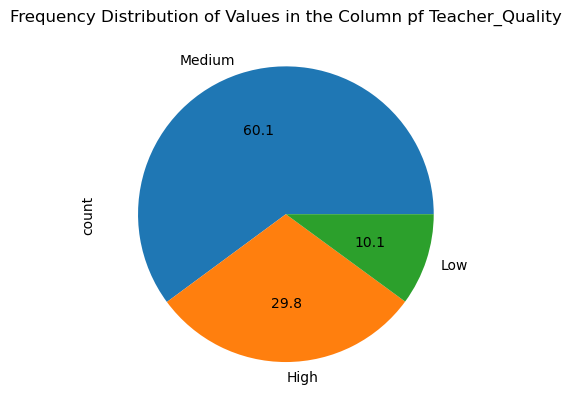

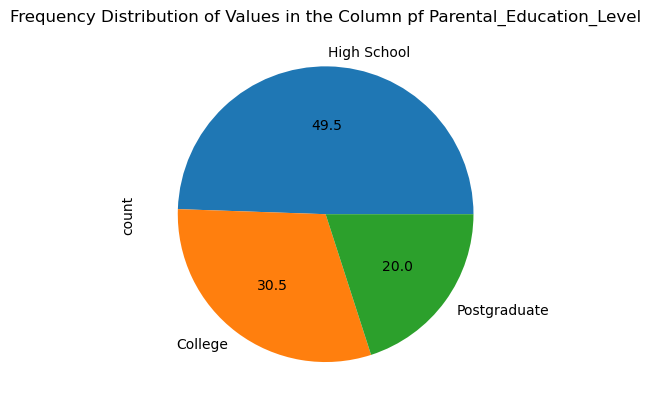

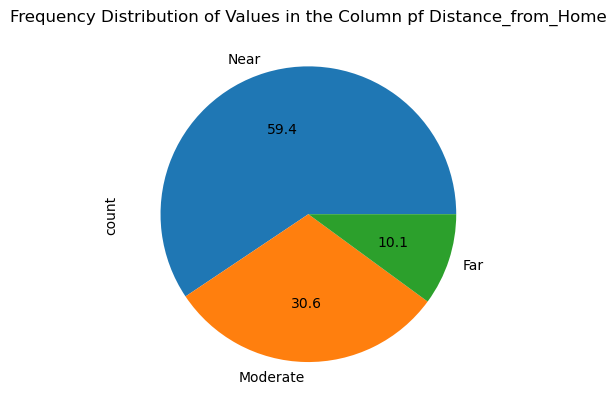

In [104]:
for column in columns_with_nan_values:
    df[column].value_counts().plot(kind='pie',autopct='%.1f')
    plt.title('Frequency Distribution of Values in the Column pf '+str(column))
    plt.show()

In [105]:
df['Teacher_Quality'] = df['Teacher_Quality'].fillna('Medium')  # Ensure no trailing space


In [106]:
df['Parental_Education_Level']= df['Parental_Education_Level'].fillna('High School')

In [107]:
df['Distance_from_Home'] = df['Distance_from_Home'].fillna('Near')

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6607 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

<strong> Labeling Categorical Data to Numerical Data.

In [109]:
label_encoder = LabelEncoder()

In [110]:
df['Teacher_Quality']

0       Medium
1       Medium
2       Medium
3       Medium
4         High
         ...  
6602    Medium
6603      High
6604    Medium
6605    Medium
6606    Medium
Name: Teacher_Quality, Length: 6607, dtype: object

In [111]:
catergorical_columns = [ 'Parental_Involvement', 'Access_to_Resources', 'Extracurricular_Activities',
    'Motivation_Level', 'Internet_Access', 'Family_Income', 'Teacher_Quality',
    'School_Type', 'Peer_Influence', 'Learning_Disabilities', 'Parental_Education_Level',
    'Distance_from_Home', 'Gender']

In [112]:
for column in catergorical_columns:
    df[column] = label_encoder.fit_transform(df[column])

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Hours_Studied               6607 non-null   int64
 1   Attendance                  6607 non-null   int64
 2   Parental_Involvement        6607 non-null   int32
 3   Access_to_Resources         6607 non-null   int32
 4   Extracurricular_Activities  6607 non-null   int32
 5   Sleep_Hours                 6607 non-null   int64
 6   Previous_Scores             6607 non-null   int64
 7   Motivation_Level            6607 non-null   int32
 8   Internet_Access             6607 non-null   int32
 9   Tutoring_Sessions           6607 non-null   int64
 10  Family_Income               6607 non-null   int32
 11  Teacher_Quality             6607 non-null   int32
 12  School_Type                 6607 non-null   int32
 13  Peer_Influence              6607 non-null   int32
 14  Physical

<strong> trying to find Best features that have strong correlations with the target variable : Exam_Score

<strong> to do this we apply standardScaler first, because PCA is sensible to variables having a different scale¶

In [118]:
X = df.drop('Exam_Score', axis = 1)
Y = df['Exam_Score']


In [119]:
X

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
0,23,84,1,0,0,7,73,1,1,0,1,2,1,2,3,0,1,2,1
1,19,64,1,2,0,8,59,1,1,2,2,2,1,0,4,0,0,1,0
2,24,98,2,2,1,7,91,2,1,2,2,2,1,1,4,0,2,2,1
3,29,89,1,2,1,8,98,2,1,1,2,2,1,0,4,0,1,1,1
4,19,92,2,2,1,6,65,2,1,3,2,0,1,1,4,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,0,2,0,7,76,2,1,1,0,2,1,2,2,0,1,2,0
6603,23,76,0,2,0,8,81,2,1,3,1,0,1,2,2,0,1,2,0
6604,20,90,2,1,1,6,65,1,1,3,1,2,1,0,2,0,2,2,0
6605,10,86,0,0,1,6,91,0,1,2,1,2,0,2,3,0,1,0,0


In [120]:
Y.head()

0    67
1    61
2    74
3    71
4    70
Name: Exam_Score, dtype: int64

In [121]:

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [122]:
X_scaled

array([[ 0.50494151,  0.34837541, -0.25424875, ...,  0.14822148,
         0.74840713,  0.85574648],
       [-0.16282241, -1.38373605, -0.25424875, ..., -1.28350266,
        -0.74366466, -1.16857039],
       [ 0.67188249,  1.56085343,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648],
       ...,
       [ 0.00411857,  0.86800885,  0.90106177, ...,  1.57994561,
         0.74840713, -1.16857039],
       [-1.66529123,  0.52158655, -1.40955928, ...,  0.14822148,
        -2.23573644, -1.16857039],
       [-0.83058633, -1.12391933,  0.90106177, ...,  1.57994561,
         0.74840713,  0.85574648]])

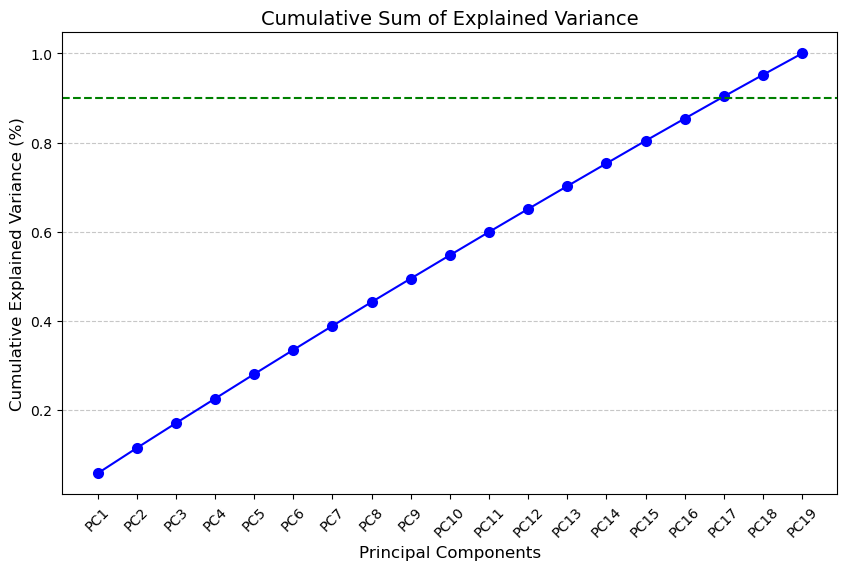

In [123]:
pca = PCA(n_components=len(X.columns))
pca.fit_transform(X_scaled)

explained_variance = pca.explained_variance_ratio_
 
#Plot the cumulative sum of explained variance
plt.figure(figsize=(10, 6))
plt.plot(np.cumsum(explained_variance), marker='o', color='blue', markeredgewidth=2)

#Add grid lines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add titles and labels
plt.title("Cumulative Sum of Explained Variance", fontsize=14)
plt.ylabel('Cumulative Explained Variance (%)', fontsize=12)
plt.xlabel('Principal Components', fontsize=12)

# Adjust the ticks on the x-axis
plt.xticks(ticks=range(len(explained_variance)), labels=[f'PC{i+1}' for i in range(len(explained_variance))], rotation=45)

plt.axhline(y=0.9, color='g', linestyle='--', label='90% Explained Variance')

plt.show()